In [1]:
import os
import urllib.request
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

Until now we have: 
   - 208 Cataracts. 175 from previous set and 33 from latest set 
   - 322 Healthy. 200 from previous set and 122 from latest set

In [29]:
path = '/home/khaldoun/Desktop/TOV_DataAcquisition/Datasets/UNHAS'

# path = 'Datasets\\UNHAS'
filename='UnhasImagesCataractIris.csv'
filename2='UnhasImagesHealthyIris.csv'
csv_path=os.path.join(path,filename)
csv_path2=os.path.join(path,filename2)
df_cataracts = pd.read_csv(csv_path)
df_healthy = pd.read_csv(csv_path2)

In [30]:
print(df_cataracts.head())
print(df_healthy.head())

    folder                                        filename  height  width  \
0  folders      WhatsApp Image 2021-03-17 at 08.50.11.jpeg     280    372   
1  folders  WhatsApp Image 2021-03-03 at 21.06.10 (1).jpeg     855   1230   
2  folders  WhatsApp Image 2021-03-03 at 20.51.54 (1).jpeg     740   1022   
3  folders  WhatsApp Image 2021-03-03 at 20.51.57 (3).jpeg     685   1022   
4  folders      WhatsApp Image 2021-03-17 at 08.15.06.jpeg     875   1008   

   bands  filesize(KB)  
0      3        42.417  
1      3       137.824  
2      3       131.453  
3      3       135.339  
4      3       294.787  
                   folder                                        filename  \
0  UnhasImagesHealthyIris   WhatsApp Image 2021-03-27 at 18.01.43(1).jpeg   
1  UnhasImagesHealthyIris      WhatsApp Image 2021-03-18 at 13.52.56.jpeg   
2  UnhasImagesHealthyIris  WhatsApp Image 2021-03-17 at 17.03.21 (1).jpeg   
3  UnhasImagesHealthyIris            7 - dr. Irnawanti Lestari Right.jpeg   
4 

In [31]:
#Reading cataract images
cat_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesCataractIris')
file_names = df_cataracts.filename
row=64
col=64

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        cat_images.append(image)
    except:
        noread.append(image_name)
        continue

cat_images = np.array(cat_images)
noread = np.array(noread)

100%|██████████| 70/70 [00:00<00:00, 7975.26it/s]


In [32]:
cat_images.shape

(70, 64, 64, 3)

In [33]:
#Reading healthy images
healthy_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesHealthyIris')
file_names = df_healthy.filename
row=64
col=64

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        healthy_images.append(image)
    except:
        noread.append(image_name)
        continue
        
healthy_images = np.array(healthy_images)
noread = np.array(noread)

100%|██████████| 322/322 [00:00<00:00, 9031.83it/s]


In [34]:
healthy_images.shape

(322, 64, 64, 3)

# Prepare Data for Machine Learning|


In [35]:
cat_images.shape

(70, 64, 64, 3)

In [36]:
import matplotlib.pyplot as plt
import pandas as pd 


images = []
labels = []

for i , d in enumerate(cat_images):
    images.append(d)
    labels.append(1)
for i , d in enumerate(healthy_images):
    images.append(d)
    labels.append(0)  
    
Images = np.array(images)
Labels = np.array(labels)

In [10]:
pd.DataFrame(Labels).value_counts()

0    322
1     70
dtype: int64

0


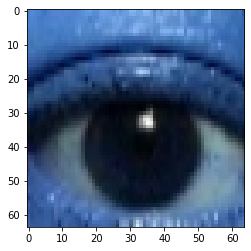

0


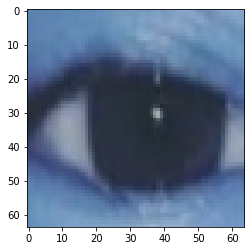

0


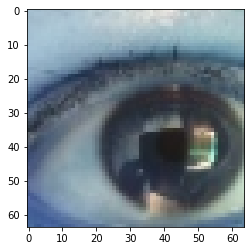

0


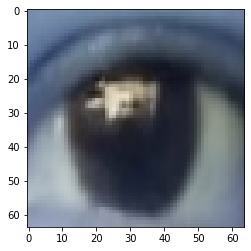

0


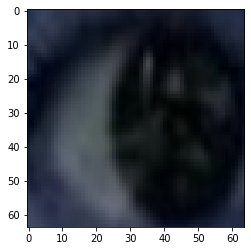

0


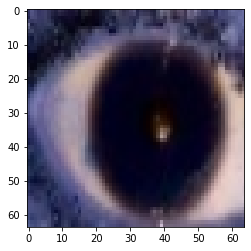

0


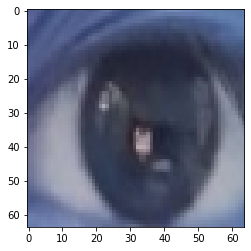

0


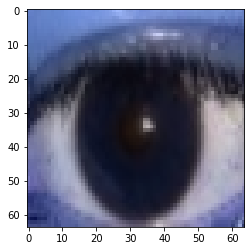

0


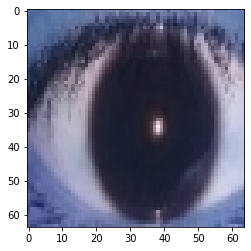

0


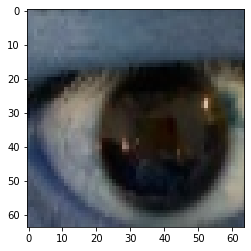

0


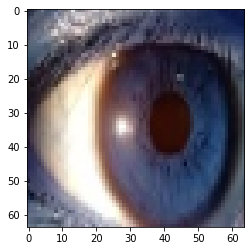

0


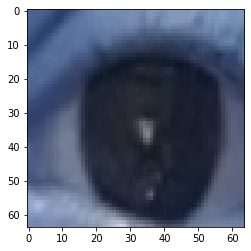

0


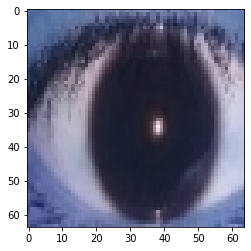

0


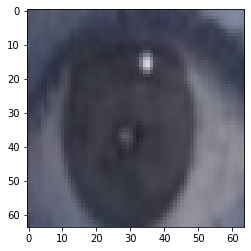

1


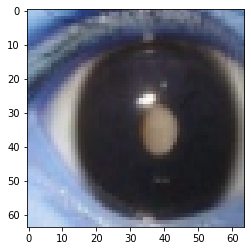

0


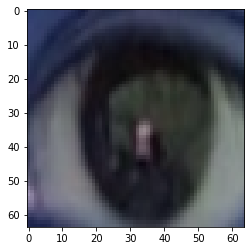

0


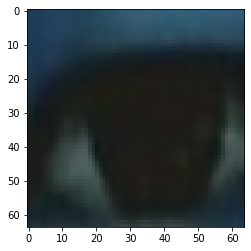

0


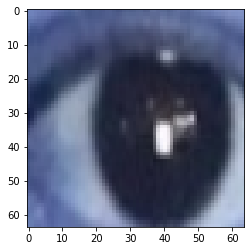

0


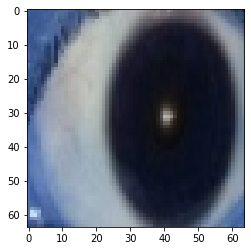

0


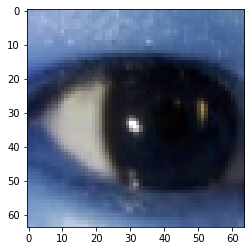

0


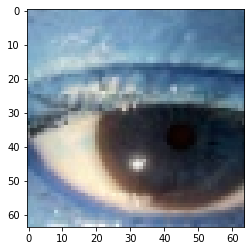

0


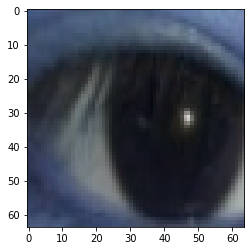

0


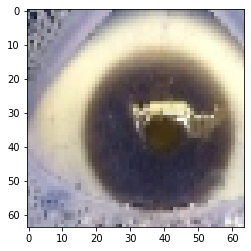

0


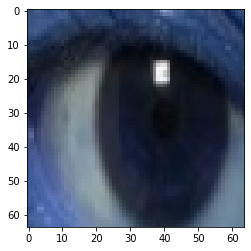

0


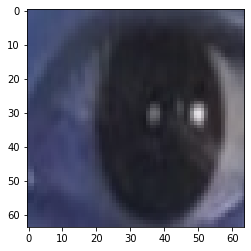

0


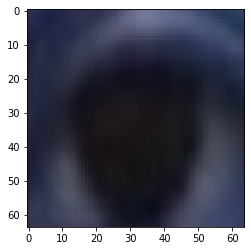

0


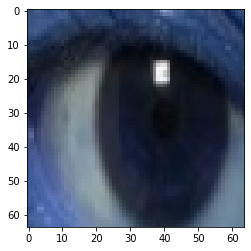

0


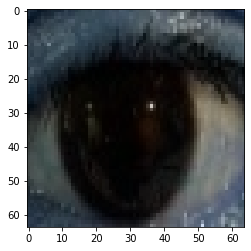

1


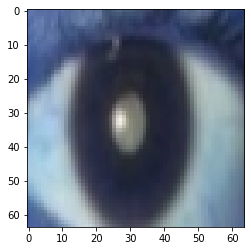

0


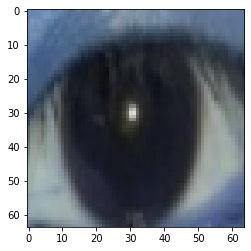

0


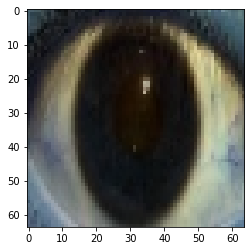

0


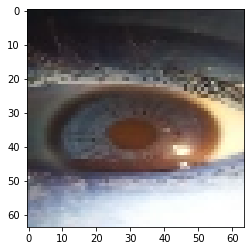

0


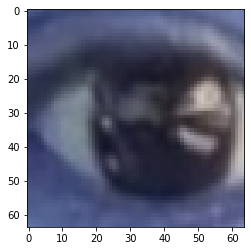

0


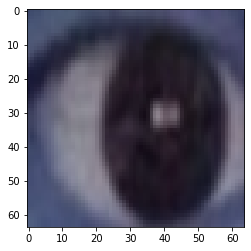

0


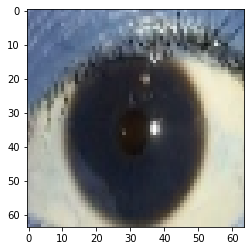

1


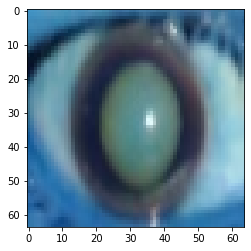

0


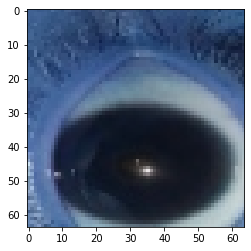

1


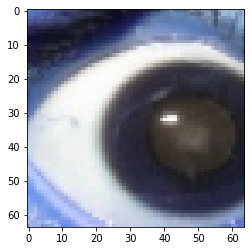

0


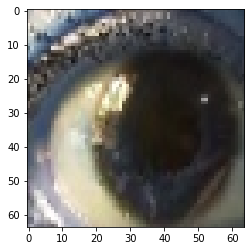

0


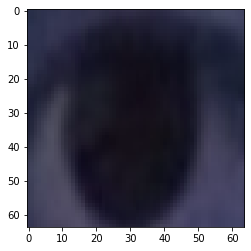

0


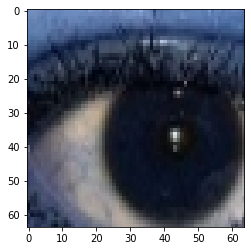

0


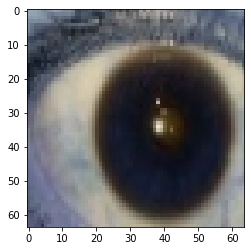

0


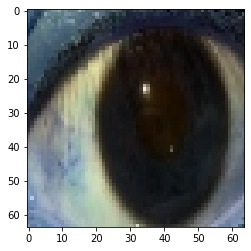

0


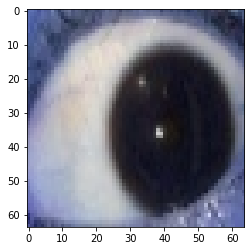

0


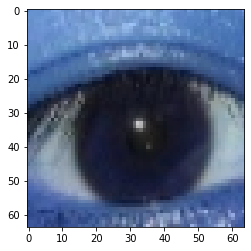

0


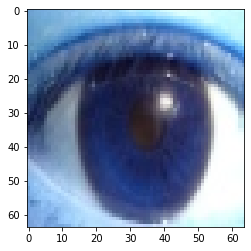

1


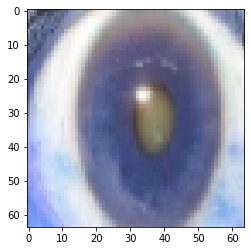

0


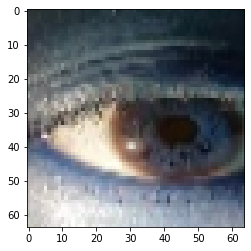

1


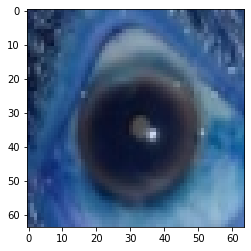

0


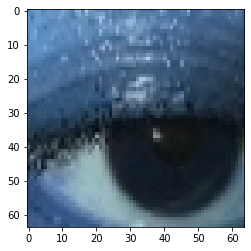

0


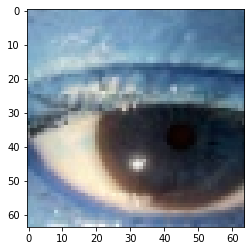

0


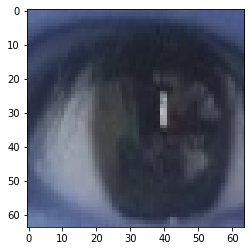

1


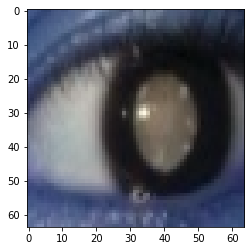

0


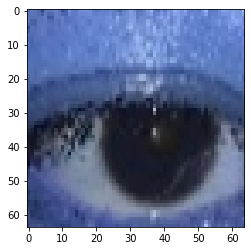

0


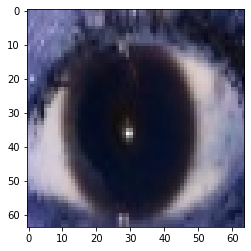

1


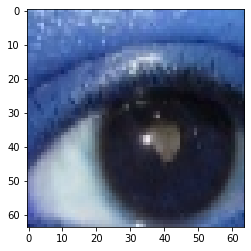

1


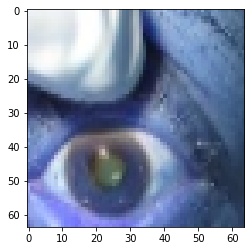

0


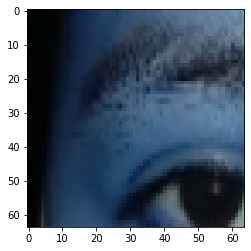

0


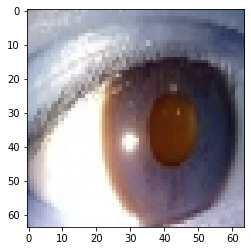

0


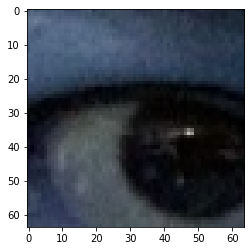

In [11]:
import random 
for i in range(60):
    n = random.randint(0, len(labels))
    plt.imshow(images[n])
    print(labels[n])
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.33, shuffle = True, random_state = 1)

pd.DataFrame(y_train).value_counts()

0    211
1     51
dtype: int64

In [13]:
from random import sample
#prepare training data by sampling 
temp = []
for idx, label in enumerate(y_train):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in y_train if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

temp = []
for idx, label in enumerate(y_train):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

X_train = np.array(X_data)
y_train = np.array(y_data)


print(X_train.shape, y_train.shape)

pd.DataFrame(y_train).value_counts()

(102, 64, 64, 3) (102,)


1    51
0    51
dtype: int64

In [14]:
temp = []
for idx, label in enumerate(y_test):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in y_test if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(X_test[idx])
    y_data.append(y_test[idx])

temp = []
for idx, label in enumerate(y_test):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(X_test[idx])
    y_data.append(y_test[idx])

X_test = np.array(X_data)
y_test= np.array(y_data)


print(X_test.shape, y_test.shape)

pd.DataFrame(y_test).value_counts()

(38, 64, 64, 3) (38,)


1    19
0    19
dtype: int64

In [15]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model
import tensorflow as tf


save_dir = './saved_models'
model_name = 'k.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)



In [16]:
def Creat_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(BatchNormalization())
    model.add(layers.Dense(64))
    model.add(BatchNormalization())
    model.add(layers.Dense(1 , activation='sigmoid'))

    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=opt, loss = 'mse',metrics=['accuracy' ])
    return model 


In [17]:
def Train( model , X_train , y_train  , epochs = 20 , name = 'Name' , X_test = X_test , y_test = y_test ):
    
#     checkpoints = ModelCheckpoint(model_path, save_best_only=True)
    history = model.fit(X_train, y_train, epochs=epochs  , validation_data=(X_test, y_test))
    
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    model.save(model_path)
    os.rename(model_path, os.path.join(save_dir, f"{name}-{int(test_acc*100)}.h5"))
    
    return history
    

Epoch 1/20
4/4 [==============================] - 0s 82ms/step - loss: 0.2424 - accuracy: 0.6373 - val_loss: 0.4999 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 0s 50ms/step - loss: 0.0478 - accuracy: 0.9412 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 51ms/step - loss: 0.0212 - accuracy: 0.9804 - val_loss: 0.4998 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 60ms/step - loss: 0.0258 - accuracy: 0.9706 - val_loss: 0.4989 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 0s 51ms/step - loss: 0.0143 - accuracy: 0.9804 - val_loss: 0.4676 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 0s 52ms/step - loss: 0.0153 - accuracy: 0.9902 - val_loss: 0.4797 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 0s 52ms/step - loss: 0.0110 - accuracy: 0.9902 - val_loss: 0.4777 - val_accuracy: 0.5000
Epoch 8/20
4/4 [===========

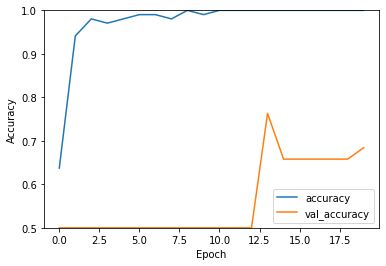

In [18]:


model = Creat_model()
history = Train(model , X_train , y_train , name = '1st_crop_')


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [20]:
pd.DataFrame(model.predict(X_test))

,0
0,0.998196
1,0.959051
2,0.991604
3,0.464692
4,0.400612
5,0.696953
6,0.975786
7,0.951750
8,0.264679
9,0.156030
